# GA 2.1: Mesh Tips

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.1. For: 15 November, 2024.*

The purpose of this notebook is to illustrate how to use the class `Mesh` which is defined in the file `utilities.py`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from utilities import *

The cell below begins with the geometry that is used to form the "U" for GA 1.2 It is defined by an array of points. When instantiating the class, the boundaries are specified using a list of lists, where each item (list) in the list defines the conditions, then the coordinates, of a boundary. For example:

```
boundaries = [[['Neumann', +1], [0, 1]]]
```

defines a boundary condition on the line connecting the 0th and 1st coordinates (rows 0 and 1 of `coordinates`, where a Neumann condition with $\partial\phi/\partial n=1$. Note in the example below, that multiple coordinates can be used to define a boundary line.

When the class is instantiated, all boundary sides that are not specified are unassigned. When the discretized scheme is solved (later with method `solve`), these unspecified boundaries receive a no flux boundary by default. Each boundary can be defined using as many nodes as desired, though the boundary will retain its shape regardless of how many times the mesh is refined (this is logical, as refinement only subdivides triangles, thus the sides of a triangle always remain straight).

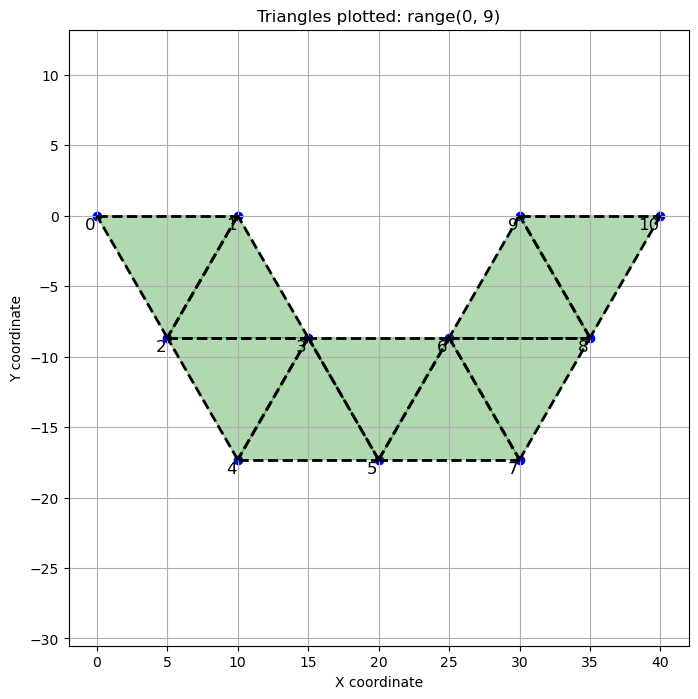

In [3]:
length = 10

coordinates = [[  0.,    0.   ],
               [ 10.,    0.   ],
               [  5.,   -8.660],
               [ 15.,   -8.660],
               [ 10.,  -17.320],
               [ 20.,  -17.320],
               [ 25.,   -8.660],
               [ 30.,  -17.320],
               [ 35.,   -8.660],
               [ 30.,    0.   ],
               [ 40.,    0.   ]]

coordinates = np.array(coordinates)

boundaries = [[['Neumann', +1], [0, 1]],
              [['Neumann',  0], [1, 3, 6, 9]],
              [['Neumann', -1], [9, 10]],
              [['Neumann',  0], [10, 7, 4, 0]]]

mesh = Mesh(coordinates, length, boundaries)
mesh.plot_triangles();

## Boundary Conditions

The boundary conditions are automatically processed when the class is instantiated. In particular, the following attributes are used to easily identify and apply the boundary conditions in the `solve` method.

`boundary_sides` identifies the sides of a triangle where a boundary is applied, where a "side" is the index of the list `all_sides`, which is itself a list of lists, each of which defines the index of the vertices defining the side in `.coordinates`

`mesh.boundary_types` defines the boundary condition, specified with a list of lists, as described above.

In [4]:
print('Boundary sides:', mesh.boundary_sides)
print('Boundary types:', mesh.boundary_types)
print(f'Boundary side 2 is defined for side '
      +f'{mesh.boundary_sides[2]}')
print(f'Side {mesh.boundary_sides[2]} is defined by '
      +f'coordinates {mesh.all_sides[mesh.boundary_sides[2]]}')

Boundary sides: [0, 2, 4, 6, 7, 10, 12, 13, 16, 17, 18]
Boundary types: [['Neumann', 1], ['Neumann', 0], ['Neumann', -1], ['Neumann', 0]]
Boundary side 2 is defined for side 4
Side 4 is defined by coordinates [1, 3]


A method `plot_boundaries` can be used to visualize the the sides where boundary conditions are applied.

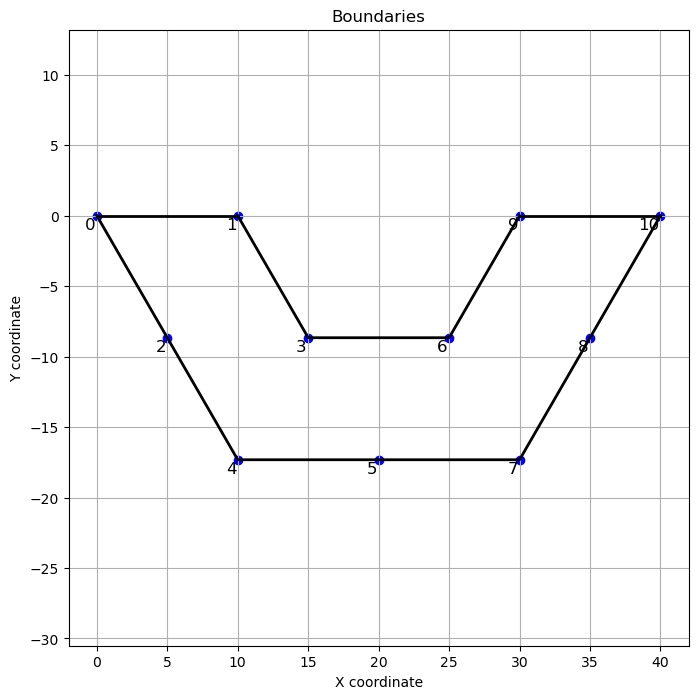

In [5]:
mesh.plot_boundaries();

## Initial Conditions

Initial conditions are defined for each triangle and can be found with the attribute `initial_conditions`. Note that the first time the cell below is run it will indicate that this is stored as an array and instantiated with default values of $T=0$ C for each triangle.

In [6]:
mesh.initial_conditions

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

More interesting initial conditions can be evaluated using the `set_initial_conditions` method with the following keyword arguments:

- `default` will set the value of every triangle to the value specified
- `special_triangles` will set the value of specific triangles to the value specified (and takes precedence over `default` value!)

The conditions for `special_triangles` are specified as a list of lists, where the inner list contains two values, the triangle index and the initial condition (e.g., Temperature).

For example, the cell below sets an initial value of 5 for all triangles except triangles 2 and 5, which have temperature 3 and 9, respectively.

Note in particular that the plotting function `plot_triangles` has been enabled with a keyword argument to shade the triangles according to their initial condition. The indices of the coordinates can also be removed for clarity by setting keyword argument `show_labels` to `False`.

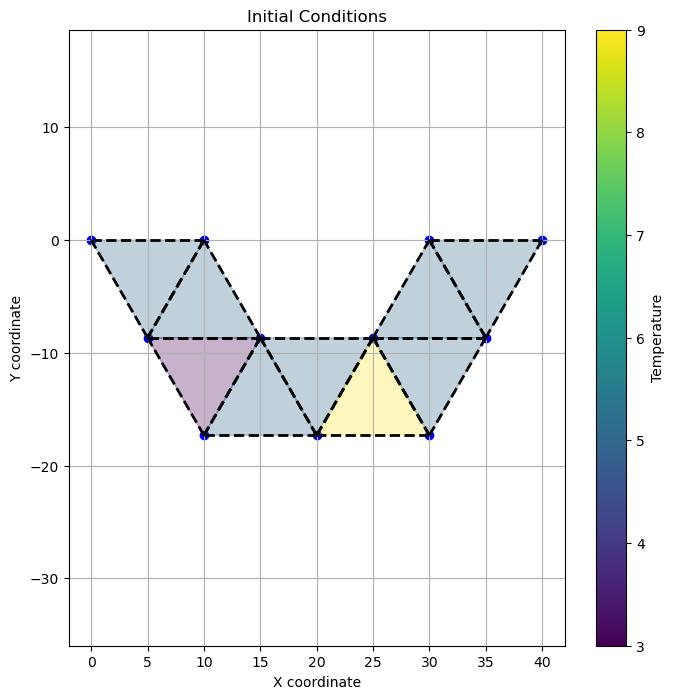

In [7]:
mesh.set_initial_conditions(default=5, special_triangles=[[2, 3],[5,9]])
mesh.plot_triangles(fill_color='initial_conditions', show_labels=False);

If you would like to easily find out what the number is of a given triangle, use the `plot_triangles` method with keyword argument `triangle_id` set to an integer or list of indices. Here is an example:

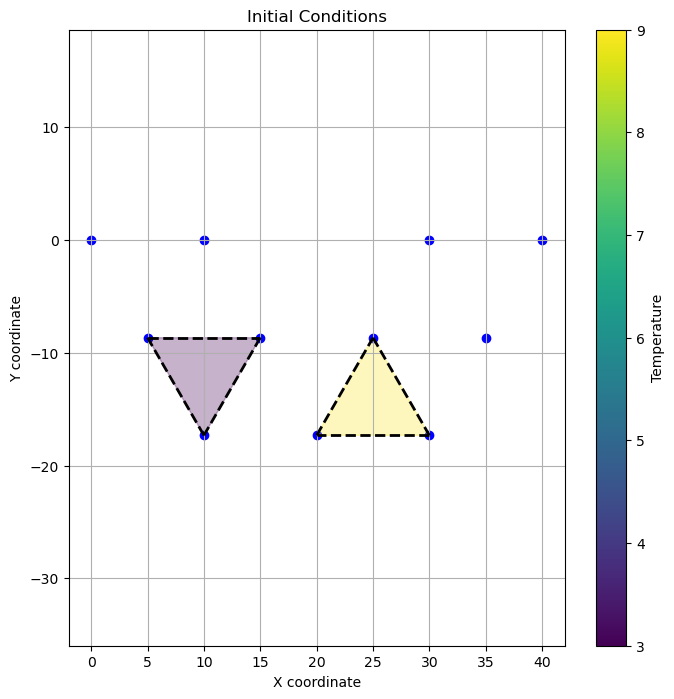

In [8]:
mesh.plot_triangles(triangle_id=[2, 5], fill_color='initial_conditions', show_labels=False);

If you are trying to find the index of a particular triangle, it could be useful to print the `triangles` attribute and compare to the plot of the coordinates to identify their indices. See if you can confirm visually using the results below that triangle 9 is the one in the top right, with coordinates 8, 9 and 10.

[[0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5], [3, 5, 6], [5, 6, 7], [6, 7, 8], [6, 8, 9], [8, 9, 10]]


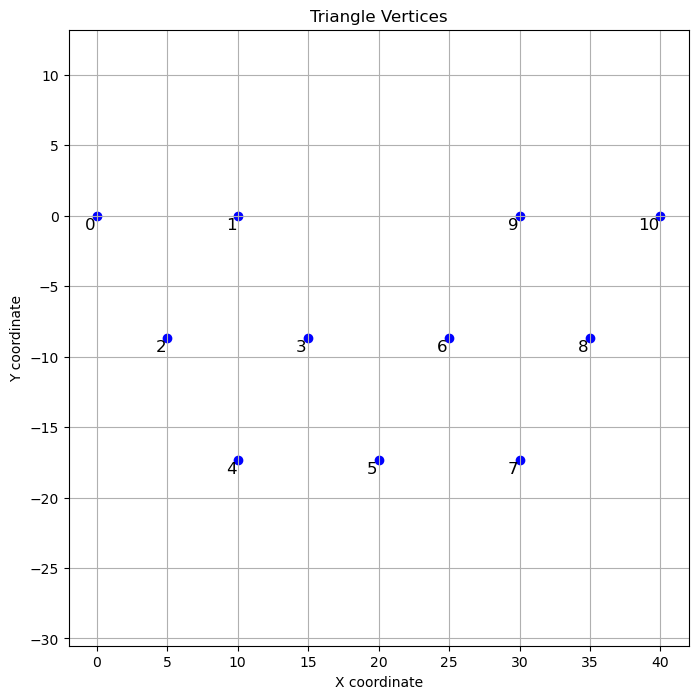

In [9]:
print(mesh.triangles)
mesh.plot_coordinates();

## Solve!

The `Mesh` class has been set up with a method `solve` to solve the algebraic system of equations for FVM. The input arguments required define the time integration scheme (final time $t_{final}$ and number of time steps $N_t$), as well as the diffusion coefficient, $D$.

In [10]:
mesh.solve(20, 1000, 50);

Solving complete!
  t_final = 20, Nt = 1000, D = 50


As seen above, a short message is printed when solving is completed. The results are stored in the attribute `unknowns` which includes the solutions for unknowns $\phi_i^n$ for all time steps and triangles. 

In [11]:
print('First time step:', mesh.unknowns[0,:])
print('Last time step:', mesh.unknowns[-1,:])

First time step: [5. 5. 3. 5. 5. 9. 5. 5. 5.]
Last time step: [ 28.14797136  22.3946892   16.65951549  10.93734285   5.22222223
  -0.4928984   -6.21507104 -11.95024476 -17.70352692]


Note that you can also visualize the solution with the method `plot_triangles` and by setting the keyword argument `fill_color` to `unknowns`:

NOTE: min value color scale adjusted below min initial value


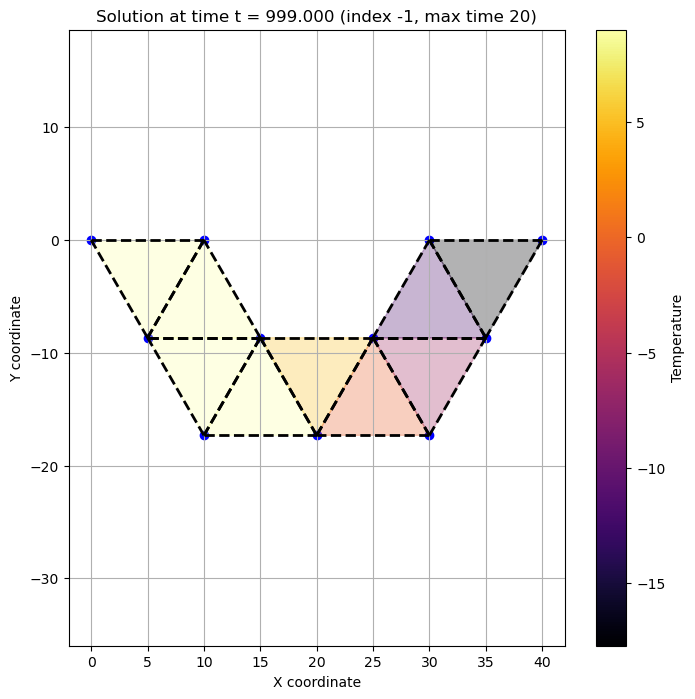

In [12]:
mesh.plot_triangles(fill_color='unknowns', show_labels=False);

The method `plot_triangles` can visualize specific time steps using keyword argument `time_step` (an integer). The default value is the final time step: `time_step=-1`.

Here is an example that shows the 5th time step, when the temperature has already started to diffuse from the high temperature triangles to the lower temperature adjacent ones.

**Note that you will not be able to see this until you have "fixed" the mistake in `utilities.py`**

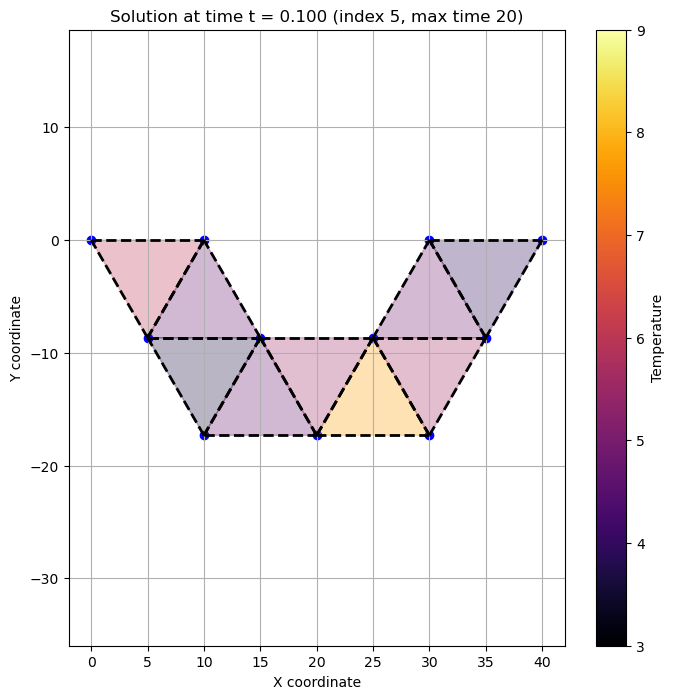

In [13]:
mesh.plot_triangles(fill_color='unknowns',
                    time_step=5,
                    show_labels=False);

## Refine the mesh

Executing the method `refine_mesh` will create a new mesh that is filled with triangles that are half the size of the prior triangles. The class automatically carries out all tasks needed to facilitate solving this new geometry with _the same boundary conditions and initial conditions specified in the original geometry._

The example below refines the mesh then visualizes it.

Refining mesh...initial status:
  refinements:  0
  points:       11
  triangles:    9
  sides:        19
  side length:  10
Refinement complete...final status:
  refinements:  1
  points:       30
  triangles:    36
  sides:        65
  side length:  5.0
Time taken for refinement: 0.179986 seconds


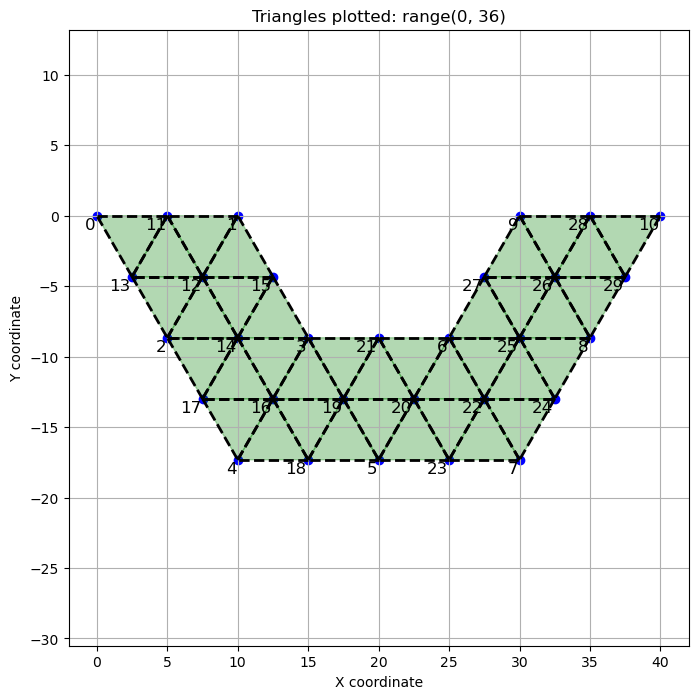

In [14]:
mesh.refine_mesh();
mesh.plot_triangles();

Note that the solution technique works as expected.

In this case a note is printed about the color bar, which warns that the scale has been adjusted in the plot. This is important to note if you are comparing two figures, as if the scale is changed the colors for specific triangles can no longer be compared. This happens if the solution plotted has temperature values outside the range of initial conditions, which are the limits used to create the default color scale. It happens when the boundary conditions result in a final temperature that changes significantly from the initial conditions (for example, imagine initial conditions of 0 C, with boundary conditions where the flux into the volume is positive - the final temperature will be higher than 0!).

Solving complete!
  t_final = 20, Nt = 1000, D = 50
NOTE: min value color scale adjusted below min initial value


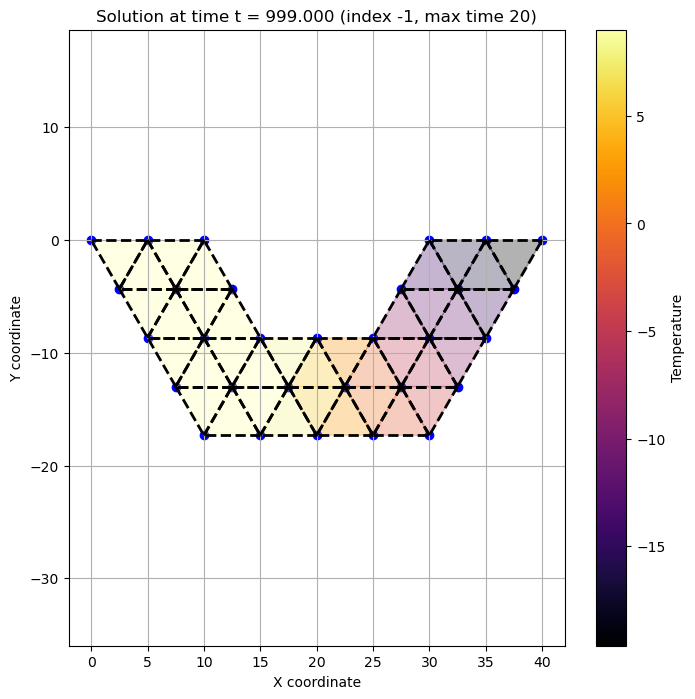

In [15]:
mesh.solve(20, 1000, 50);
mesh.plot_triangles(fill_color='unknowns', show_labels=False);

Note that the mesh can be refined repeatedly; however, as the code is not optimized for efficiency, it will start to take a long time if you use this method too many times. Note that the third refinement (so the fourth geometry) takes 20 seconds to create. And the solution will then take a _very_ long time!

**We recommend that you don't refine the mesh more than 3 times, and only try to solve this 4th geometry if you are able to let the solution run for a few minutes.**

Refining mesh...initial status:
  refinements:  1
  points:       30
  triangles:    36
  sides:        65
  side length:  5.0
Refinement complete...final status:
  refinements:  2
  points:       95
  triangles:    144
  sides:        238
  side length:  2.5
Time taken for refinement: 1.834150 seconds


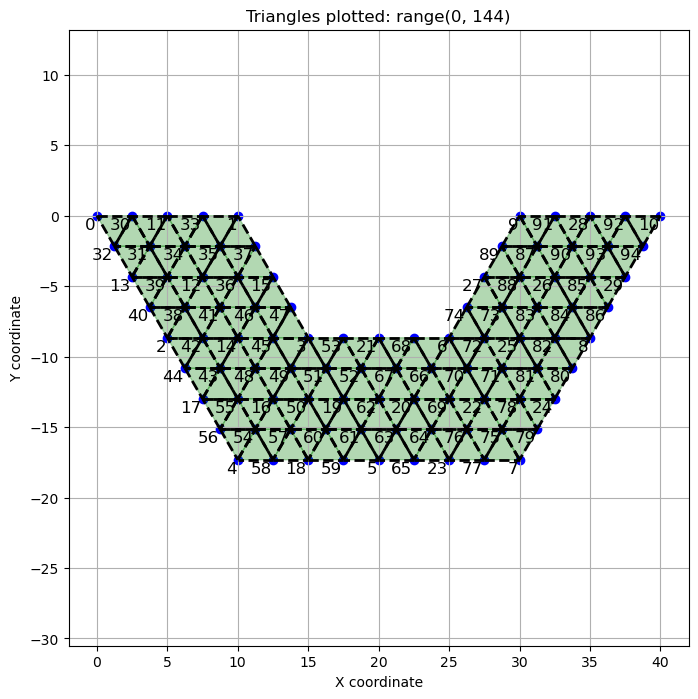

In [16]:
mesh.refine_mesh();
mesh.plot_triangles();

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.